# Machine Learning

***

## 평가 지표 - sklearn의 metrics 이용!

### 평가지표(실제 값, 예측 값) 형태로 성능을 평가한다.

머신러닝으로 모델링을 하고 난 후 모델을 평가할 때 평가지표를 이용합니다. 성능 평가 지표는 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉩니다. 모두 예측 값과 실제 값의 차이를 기반으로 모델을 평가합니다. 

#### 그 중에서 먼저 분류의 평가 지표부터 살펴보겠습니다.

- 정확도(accuracy)
- 오차행렬
- 정밀도(precision)
- 재현율(recall)
- f1 score
- roc auc
***

### 정확도(Accuracy)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

In [2]:
pred = [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
actual = [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
acc = accuracy_score(actual, pred)

In [5]:
acc

0.6

전체 15개 데이터 중 9개의 데이터가 같은 값을 가지므로 9/15 = 60%의 정확도를 나타낸다.

<font color = 'red'>Quiz> iris 데이터를 학습한 모델의 정확도를 출력하시오.
- 아래 코드는 건들지 마세요!
- test 데이터에 대해 정확도를 출력하세요.

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [7]:
### Don't touch!
data = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
data['target'] = load_iris().target
test = data.sample(20, random_state = 42)
train = data.query('index not in @test.index')

In [8]:
model = LogisticRegression(random_state = 42)

In [9]:
###아래에 답을 입력하세요.

분류의 경우 예측을 하는 방법은 두 가지 입니다.
- model.predict(데이터) -> class로 예측
- model.predict_proba(데이터)[:, 1] -> 확률 반환

In [10]:
from sklearn.datasets import load_breast_cancer

In [11]:
data = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)

In [12]:
data['target'] = load_breast_cancer().target

In [13]:
test = data.sample(69, random_state = 42)
train = data.query('index not in @test.index')

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(random_state = 42)

In [16]:
X = train.drop('target', axis = 1)
y = train['target']

In [17]:
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [18]:
target = test.drop('target', axis = 1)

In [19]:
pred1 = model.predict(target)
pred2 = model.predict_proba(target)[:, 1]

In [20]:
pred1

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1])

class로 예측 값을 도출한다.

In [21]:
pred2

array([0.96, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.04, 0.31, 0.97, 0.92,
       0.02, 0.98, 0.15, 0.99, 0.01, 0.94, 1.  , 1.  , 0.  , 0.79, 1.  ,
       0.  , 1.  , 1.  , 0.92, 1.  , 0.93, 1.  , 0.  , 0.98, 1.  , 0.8 ,
       0.9 , 1.  , 1.  , 0.29, 0.92, 0.  , 0.93, 1.  , 0.01, 1.  , 1.  ,
       0.73, 0.99, 0.98, 0.96, 1.  , 0.95, 0.  , 0.  , 0.78, 0.85, 1.  ,
       0.97, 1.  , 0.  , 0.35, 1.  , 1.  , 0.  , 0.  , 0.93, 1.  , 0.95,
       0.  , 0.02, 1.  ])

0 ~ 1 사이의 확률로 해당 class일 확률을 반환한다.

즉 model.predict(데이터)는 확률이 0.5 보다 크면 1을 그렇지 않은 경우 0을 반환한다.

그럼 확률로 반환했을 때는 클래스로 어떻게 바꾸나?

In [22]:
(pred2 > 0.5).astype(int)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1])

이처럼 0.5와 같이 임계 기준지점을 threshold라고 부르고 분류에서는 이 threshold를 변경할 때마다 예측 값이 달라진다.

- threshold = 0.5
- threshold = 0.8

In [23]:
pred8 = (pred2 >= 0.8).astype(int)

In [24]:
acc5 = accuracy_score(test['target'], pred1)
acc8 = accuracy_score(test['target'], pred8)

In [25]:
acc5, acc8

(0.9710144927536232, 0.9565217391304348)

***
### 오차 행렬(= 혼동행렬, Confusion Matrix)

모델이 예측한 결과에 대해 얼마나 잘 예측하고 헷갈려 하는지 보여주는 지표이다.

In [26]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

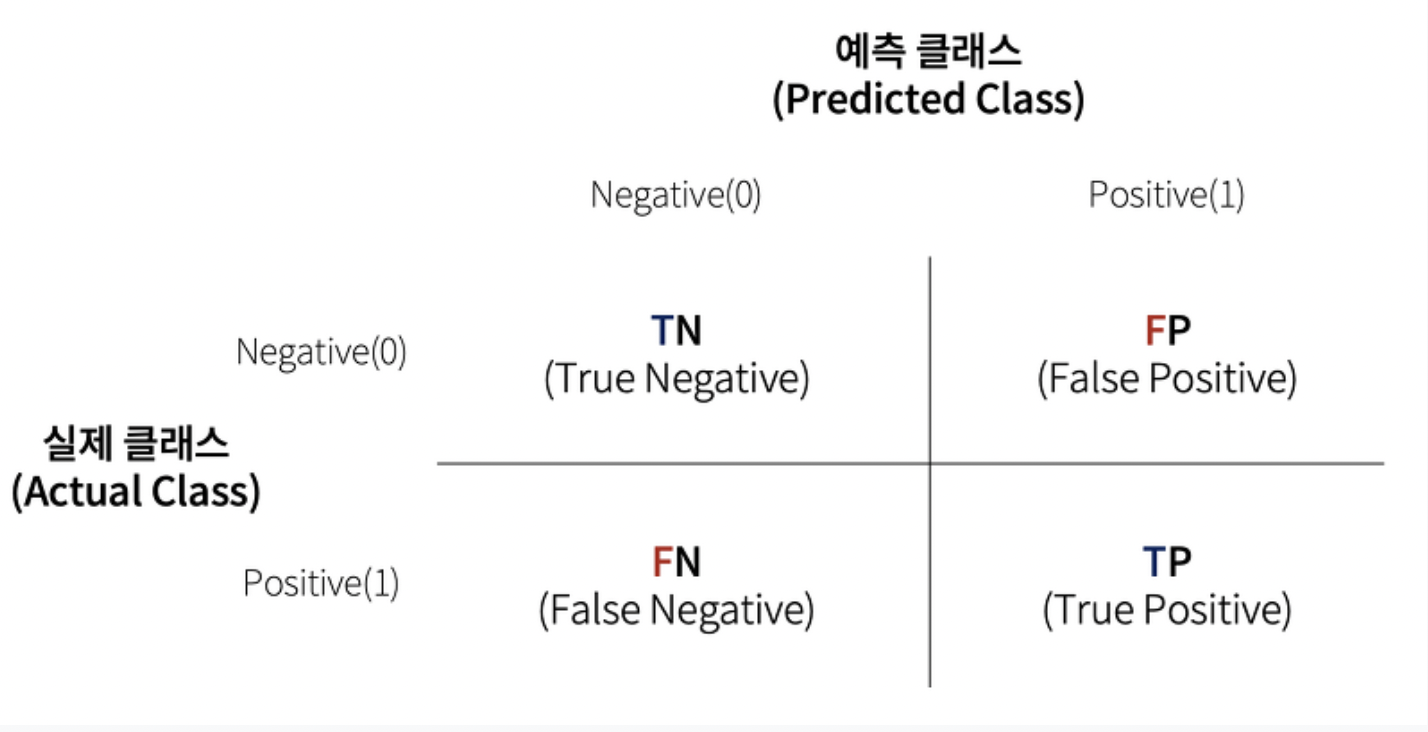

In [27]:
Image('오차행렬.png')

출처 : https://velog.io/@sset2323/03-02.-오차-행렬-Confusion-Matrix

- TN은 예측을 Negative(0)로 했고 실제로 Negative(0)
- FP는 예측을 Positive(1)로 했고 실제로 Negative(0)
- FN은 예측을 Negative(0)로 했고 실제로 Positive(1)
- TP는 예측을 Positive(1)로 했고 실제로 Positive(1)

즉, 앞에 T라는 글자는 잘 맞추었다는 의미이고 뒤에 따라오는 N, P에 따라 negative, positive로 예측했다는 의미이다.

반대로 F라는 글자는 잘못 맞추었다는 의미이고 뒤에 따라오는 N, P에 따라 negative, positive로 예측했다는 의미이다.

TN이란 무엇일까? -> 잘 예측했다(T) + N(egative)으로

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
print(confusion_matrix(test['target'], pred1))

[[22  1]
 [ 1 45]]


조금 더 가시적으로 확인하고 싶다면 seaborn의 heatmap을 이용

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

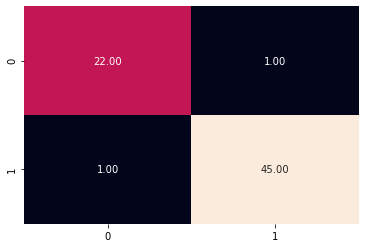

In [31]:
sns.heatmap(confusion_matrix(test['target'], pred1), annot = True, fmt = '.2f', cbar= False)
plt.show()

<font color = 'red'>Quiz> 위의 confusion matrix를 보고 TN, TP, FN, FP를 제시하시오.

### 정밀도 & 재현율

정밀도와 재현율은 Positive 데이터의 예측성능에 좀 더 초점을 맞춘 평가지표이다. 공식은 아래와 같다.

- 정밀도(precision) = TP / (FP + TP)
- 재현율(recall) = TP / (FN + TP)

정밀도는 positive로 예측한 대상 중 실제로도 positive인 데이터의 비율을 의미한다. 즉 1이라고 예측한 값 중에서 실제 1인 값을 의미한다. positive 예측 성능을 정밀하게 평가하기 위한 양성 예측도라고도 불린다.

재현율은 positive인 실제 값 중에 예측도 positive인 데이터의 비율이다. 민감도(Sensitivity) 또는 TPR(True Positive Rate)이라고도 불린다.

재현율이 중요 지표인 경우는 실제로 Positive인 데이터를 Negative로 예측할 경우 큰 문제가 발생하는 경우이다. 예를 들어 암을 예측하는 모델을 만든다고 했을 때 A 환자가 암 환자임에도 불구하고 모델이 A 환자에 대해 음성 판정을 할 경우 심각한 상황이 초래된다.

- 재현율이 더 중요한 경우 : 실제 Positive인 데이터를 Negative로 예측할 경우 문제가 발생할 때
- 정밀도가 더 중요한 경우 : 실제 Negative인 데이터를 Positive로 예측할 경우 문제가 발생할 때

In [32]:
from sklearn.metrics import recall_score, precision_score

In [33]:
print(recall_score(test['target'], pred1))
print(precision_score(test['target'], pred1))

0.9782608695652174
0.9782608695652174


<font color = 'red'>Quiz> validation 데이터에 대해 정확도, 민감도, 정밀도를 출력하시오.
    
- 사용 모델은 자유롭게 정해주세요

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

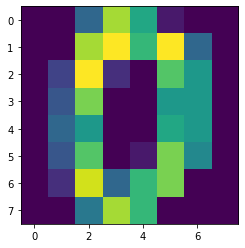

In [35]:
plt.imshow(load_digits().data[0].reshape(8, 8))
plt.show()

In [36]:
data = pd.DataFrame(load_digits().data, columns = load_digits().feature_names)
data['target'] = load_digits().target
data = data[data.target.isin([1, 8])]

In [37]:
X = data.drop('target', axis = 1)
y = data['target']

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 42, stratify = y)

아래에 코드를 입력하세요!

### F1 스코어

F1 스코어는 정밀도와 재현율을 결합한 지표이다. 두 지표 중 한 쪽으로 치우쳐져 있지 않을 때 높은 값을 가진다.

$F1$ = $2$ x ($1\over recall$ + $1\over precision$) = $2$ x $precision * recall\over precision + recall$ 

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1 = f1_score(test['target'], pred1)

In [41]:
f1

0.9782608695652174

### ROC & AUC -> predict_proba 이용!!

ROC 곡선과 이에 기반한 AUC는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다. FPR을 X 축으로, TPR을 Y 축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.

TPR은 True Positive Rate의 약자로 재현율을 의미한다. 민감도에 대응하는 지표로는 TNR(True Negative Rate)이 있고 이를 특이성이라고 한다.

In [42]:
from sklearn.metrics import roc_curve

In [43]:
fpr, tpr, threshold = roc_curve(test['target'], pred2)

In [44]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04347826, 0.04347826,
       0.08695652, 0.08695652, 0.2173913 , 0.39130435, 1.        ])

In [45]:
tpr

array([0.        , 0.47826087, 0.52173913, 0.58695652, 0.7173913 ,
       0.73913043, 0.86956522, 0.93478261, 0.93478261, 0.97826087,
       0.97826087, 1.        , 1.        , 1.        , 1.        ])

In [46]:
threshold

array([2.  , 1.  , 0.99, 0.98, 0.95, 0.94, 0.92, 0.8 , 0.79, 0.73, 0.35,
       0.31, 0.04, 0.01, 0.  ])

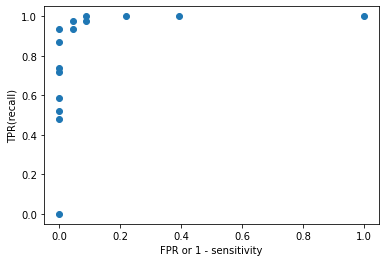

In [47]:
plt.scatter(fpr, tpr)
plt.ylabel('TPR(recall)')
plt.xlabel('FPR or 1 - sensitivity')
plt.show()

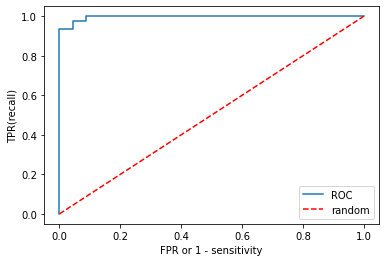

In [48]:
plt.plot(fpr, tpr, label = 'ROC')
plt.plot([0,1], [0, 1], 'r--', label = 'random')
plt.ylabel('TPR(recall)')
plt.xlabel('FPR or 1 - sensitivity')
plt.legend()
plt.show()

파란선 아래 면적이 AUC(Area Under Curve)를 의미한다! 즉 ROC 곡선의 아래 면적을 구한 것으로 직사각형에 가까울수록(= 면적이 1에 가까울수록) 좋은 성능을 의미한다. 왼쪽 상단 모서리로 가파르게 곡선이 이동할 수록 AUC가 1에 가깝고 좋은 성능을 뜻한다. 가운데 빨강 직선은 랜덤 수준으로 성능이 0.5를 뜻한다.

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
roc_auc = roc_auc_score(test['target'], pred2)

In [51]:
roc_auc # 1에 가깝다!

0.9962192816635161

<font color = 'red'> Quiz> 정밀도 재현율 문제에서 모델의 roc_auc_score를 출력하시오.

***
### 회귀 모델링 평가 지표

- MAE : Mean Absolute Error로 실제 값과 예측 값의 차이를 절댓값으로 변환해 낸 평균
- MSE : Mean Squared Error로 실제 값과 예측 값의 차이를 제곱해 낸 평균
- RMSE : MSE는 오류의 제곱을 구하므로 MSE는 실제 오류의 평균 보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것
- R$^2$ : 분산 기반으로 평가한 것으로 실제 값의 분산 대비 예측 값의 분산 비율을 지표로 하며 1에 가까울 수록 좋은 성능을 나타낸다.

In [52]:
from sklearn.datasets import load_boston

In [53]:
data = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
data['target'] = load_boston().target

In [55]:
train = data.sample(450, random_state = 42)
test = data.query('index not in @train.index')

In [57]:
X = train.drop('target', axis = 1)
y = train['target']

target = test.drop('target', axis = 1)
actual = test['target']

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor(random_state = 42)

In [64]:
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [62]:
rf_pred = rf.predict(target)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [68]:
mae = mean_absolute_error(actual, rf_pred)
mse = mean_squared_error(actual, rf_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, rf_pred)

In [69]:
print(f'MAE = {mae} / MSE = {mse} / RMSE = {rmse} / MAPE = {mape}')

MAE = 1.825892857142854 / MSE = 7.688061107142842 / RMSE = 2.772735311410529 / MAPE = 0.08892232441814898
